In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_text_file(file_path):
    matrix = []
    with open(file_path, 'r') as file:
        for line in file:
            # Split the line into columns based on the delimiter (assuming space here)
            columns = line.strip().split()
            # Convert columns to numbers (assuming all are numeric)
            numeric_columns = [float(col) for col in columns]
            matrix.append(numeric_columns)
    return matrix

In [3]:
def read_golden_file1(file_path):
    column1 = []
    column2 = [] 
    column3 = []
    with open(file_path, "r") as file:
        for line in file:
            columns = line.split()
            if len(columns) == 3:
                value1 = int(columns[0])
                value2 = int(columns[1])
                value3 = int(columns[2])
                column1.append(value1)
                column2.append(value2)
                column3.append(value3)
                
    smaller_arrays1 = np.array_split(np.array(column1), 4)
    final1 = [subarray[:50] for subarray in smaller_arrays1]
    gold_data1 = np.array(final1).flatten()

    smaller_arrays2 = np.array_split(np.array(column2), 4)
    final2 = [subarray[:50] for subarray in smaller_arrays2]
    gold_data2 = np.array(final2).flatten()

    smaller_arrays3 = np.array_split(np.array(column3), 4)
    final3 = [subarray[:50] for subarray in smaller_arrays3]
    gold_data3 = np.array(final3).flatten()
    
    return np.stack((gold_data1, gold_data2, gold_data3),axis= 1)

In [4]:
def cal_diff(gold_vx,vd_x):
    gold_vx = np.array(gold_vx)
    vd_x = np.array(vd_x)

    x2 = np.array([0.0, 0.0, 0.0])  

    for i in range(5): 
        x1 = []
        d1 = vd_x[i]  
        for j in range(3):  
            a1 = d1 - gold_vx[i][j]     
            ex1 = np.min(np.abs(a1))    
            ex1 = ex1 ** 2             
            x1.append(ex1)
        x2 = x2 + np.array(x1)

    rmse1 = np.sqrt(x2 / len(gold_vx)) 
    return rmse1.tolist()

In [5]:
gold_vx  = read_golden_file1("./DPFL/Results_FX/V8_golden.dat")

def write_golden_target(array):
    golden_data_t1 = open("./DPFL/Results_FX/V8_golden.dat", "a") # File to store all golden data
    array_line = ' '.join(map(str, array))
    golden_data_t1.write(array_line + "\n")
    golden_data_t1.close()
# for i in range(200):
#     write_golden_target(gold_vx[i])

In [6]:
vx_d = read_text_file("./DPFL/Results_FX/P200_Vd2_snr_"+"40"+".dat")
vx_d = np.array(vx_d)
cols = vx_d[:, [0, 3, 6]]
np.shape(cols)

(200, 3)

In [8]:
ex1 = []
ex2 = []
snr_axis = [-15, -10, -5, 0, 5,10,15,20,25,30,35,40]
for snr in snr_axis:  
    vx_d = read_text_file("./DPFL/Results_FX/P200_Vd2_snr_"+str(snr)+".dat")
    vx_d = np.array(vx_d)
    ps = vx_d[:, [3, 4, 5]]
    rmse1 = cal_diff(gold_vx,ps)
    pl = vx_d[:, [6, 7, 8]]
    rmse2 = cal_diff(gold_vx,pl)
    ex1.append(rmse1)
    ex2.append(rmse2)
ex1 = np.array(ex1)
ex1 = np.transpose(ex1)
ex2 = np.array(ex2)
ex2 = np.transpose(ex2)
ex1

array([[0.12424464, 0.11240005, 0.12832384, 0.13381467, 0.04812329,
        0.04042338, 0.04652246, 0.01499981, 0.05797654, 0.01499981,
        0.01499981, 0.01499981],
       [0.61059288, 0.46725536, 0.56904284, 0.5536172 , 0.49504476,
        0.38201499, 0.24887261, 0.05586484, 0.0417388 , 0.01740029,
        0.01984129, 0.02639507],
       [1.07523657, 0.92967337, 1.06038784, 0.99451223, 0.93976769,
        0.72454662, 0.51639493, 0.51046348, 0.43632301, 0.04560146,
        0.29562733, 0.42121675]])

In [9]:
ex1

array([[0.12424464, 0.11240005, 0.12832384, 0.13381467, 0.04812329,
        0.04042338, 0.04652246, 0.01499981, 0.05797654, 0.01499981,
        0.01499981, 0.01499981],
       [0.61059288, 0.46725536, 0.56904284, 0.5536172 , 0.49504476,
        0.38201499, 0.24887261, 0.05586484, 0.0417388 , 0.01740029,
        0.01984129, 0.02639507],
       [1.07523657, 0.92967337, 1.06038784, 0.99451223, 0.93976769,
        0.72454662, 0.51639493, 0.51046348, 0.43632301, 0.04560146,
        0.29562733, 0.42121675]])

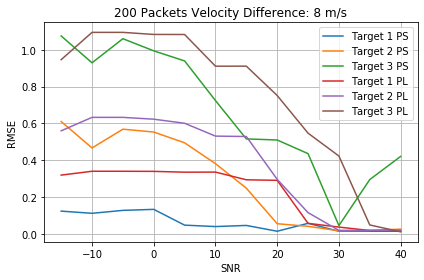

In [10]:
plt.title("200 Packets Velocity Difference: 8 m/s")
plt.plot(snr_axis, ex1[0], label = "Target 1 PS")
plt.plot(snr_axis, ex1[1],label = "Target 2 PS")
plt.plot(snr_axis, ex1[2],label = "Target 3 PS")
plt.plot(snr_axis, ex2[0], label = "Target 1 PL")
plt.plot(snr_axis, ex2[1],label = "Target 2 PL")
plt.plot(snr_axis, ex2[2],label = "Target 3 PL")
plt.xlabel("SNR")
plt.ylabel("RMSE")

plt.grid()
plt.tight_layout()
plt.legend()
plt.show()